In [ ]:
3.3.1. Introduction to KNN classification

In [1]:
'''
supervised learning:
    output predict on input
    inputs : Predictors, Independent Variables, Features, Variables
    outputs: Response variables, Dependent variables
    
Regression Problems : Quantitative response: number measures weight height 
Classification Problem  : Qualitative response: Y/N, Blue/Green

kNN : 
    1 approach to classification
    k = 5: 
        identify 5 data point near the data
        classify new data point as belonging to most common class among those neighbours

'''

'\nsupervised learning:\n    output predict on input\n    inputs : Predictors, Independent Variables, Features, Variables\n    outputs: Response variables, Dependent variables\n    \nRegression Problems : Quantitative response: number measures weight height \nClassification Problem  : Qualitative response: Y/N, Blue/Green\n\nkNN : \n    1 approach to classification\n    k = 5: \n        identify 5 data point near the data\n        classify new data point as belonging to most common class among those neighbours\n\n'

3.3.2 Finding the distance between two points

In [2]:
'''
(x1,y1) (x2,y2) 
d2 = ((x2-x1)^2 + (y2-y1)^2)0.5
mathematics : numpy
'''

'\n(x1,y1) (x2,y2) \nd2 = ((x2-x1)^2 + (y2-y1)^2)0.5\nmathematics : numpy\n'

In [3]:
import numpy as np
p1 = np.array([1,1])
p2 = np.array([4,4])
p2-p1

array([3, 3])

In [4]:
np.power(p2-p1, 2)

array([9, 9], dtype=int32)

In [5]:
np.sqrt(np.sum(np.power(p2-p1, 2)))

4.242640687119285

In [6]:
import numpy as np

def distance(p1,p2):
    '''
    Find the distance between the points p1, p2
    '''
    return np.sqrt(np.sum(np.power(p2-p1, 2)))

In [7]:
p1 = np.array([1,1])
p2 = np.array([4,4])
distance(p1,p2)

4.242640687119285

3.3.3 Majority Vote

In [8]:
'''
KNN - Majority vote
Sequence of votes 
    - 1,2,3 : determine how many times each occured and find most common elements
    ex: 2 - 1's
        1 - 2's
        1 - 3's
        majority vote - 2
        
'''

"\nKNN - Majority vote\nSequence of votes \n    - 1,2,3 : determine how many times each occured and find most common elements\n    ex: 2 - 1's\n        1 - 2's\n        1 - 3's\n        majority vote - 2\n        \n"

In [9]:
def count_words(text):
    '''
    Count the number of times each word occures in text (str). skip punctuation
    Returns dictionary where keys are unique words and values are word counts.
    
    '''
    text=text.lower()
    
    skips = [".", ",", ":", ";", "'", '"']
    for ch in skips:
        text = text.replace(ch,"")
    
    word_counts = {}
    
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        
        else:
            word_counts[word] = 1
            
    return word_counts

In [19]:
def majority_vote(votes):
    '''
    Return the most common element in votes
    
    '''
    vote_counts = {}
    
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1  
        else:
            vote_counts[vote] = 1
    
    return vote_counts

In [21]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3]

vote_counts = majority_vote(votes)
vote_counts

{1: 3, 2: 3, 3: 6}


{1: 3, 2: 3, 3: 6}

In [22]:
max(vote_counts)

3

In [23]:
max(vote_counts.keys())

3

In [24]:
max(vote_counts.values())

6

In [26]:
max_counts = max(vote_counts.values())
max_counts

6

In [28]:
for vote, count in vote_counts.items():
    print(vote,count)

1 3
2 3
3 6


In [30]:
winners = []
max_counts = max(vote_counts.values())
for vote, count in vote_counts.items():
    if count == max_counts:
        winners.append(vote)
    
winners    

[3]

In [31]:
import random

def majority_vote(votes):
    '''
    Return the most common element in votes    
    '''
    vote_counts = {}
    
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1  
        else:
            vote_counts[vote] = 1
    
    winners = []
    max_counts = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_counts:
            winners.append(vote)
    
    return random.choice(winners)

In [35]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3]

winner = majority_vote(votes)
winner

3

In [36]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]

3

In [37]:
winner = majority_vote(votes)
winner

3

In [38]:
winner = majority_vote(votes)
winner

2

In [41]:
'''
most commonly occured element in the sequence - mode
'''

import scipy.stats as ss

def majority_vote_short(votes):
    '''
    Return the most common element in votes
    '''
    mode, count = ss.mstats.mode(votes)
    return mode

In [43]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3]

majority_vote_short(votes)

array([3.])

In [45]:
votes = [1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]

majority_vote_short(votes)

array([2.])

3.3.4 Finding Nearest Neighbors

In [46]:
'''
loop over all points
    compute the distance between point p and every other point
sort distances and return those k points that are nearest to point p
'''

'\nloop overe all points\n    compute the distance between point p and every other point\nsort distances and return those k points that are nearest to point p\n'

In [50]:
'''
set simple data set
'''

points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])

In [51]:
p = np.array([2.5,2])

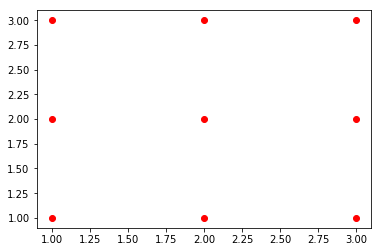

In [52]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1],"ro")

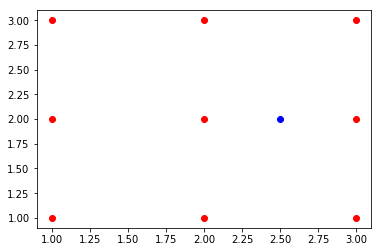

In [53]:
plt.plot(points[:,0], points[:,1],"ro")
plt.plot(p[0], p[1],"bo")

[0.5, 3.5, 0.5, 3.5]

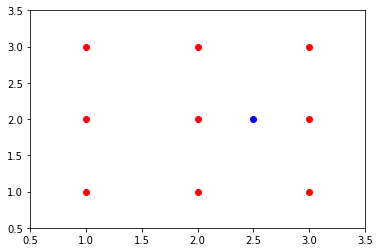

In [54]:
plt.plot(points[:,0], points[:,1],"ro")
plt.plot(p[0], p[1],"bo")
plt.axis([0.5,3.5,0.5,3.5])

In [55]:
distances = np.zeros(points.shape[0]) #empty array to hold all distances between points
for i in range(len(distances)):
    distances[i]= distance(p, points[i])  #calculate distance between point p and each of the points in array

In [57]:
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [58]:
points[4]

array([2, 2])

In [59]:
distances[4]

0.5

In [60]:
points[7]

array([3, 2])

In [61]:
distances[7]

0.5

In [64]:
#sort array
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [65]:
ind = np.argsort(distances)
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2], dtype=int64)

In [66]:
distances[ind]

array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

In [67]:
distances[ind[0:2]]

array([0.5, 0.5])

In [68]:
def find_nearest_neighbors(p, points, k=5):
    '''
    find k nearest neighbors of point p and return their indices. 
    '''
    distances = np.zeros(points.shape[0]) #empty array to hold all distances between points
    for i in range(len(distances)):
        distances[i]= distance(p, points[i])  #calculate distance between point p and each of the points in array
    ind = np.argsort(distances)
    return ind[:k] #similar [0:k]

In [69]:
ind = find_nearest_neighbors(p,points,2)
print(points[ind])

[[2 2]
 [3 2]]


In [70]:
ind = find_nearest_neighbors(p,points,3)
print(points[ind])

[[2 2]
 [3 2]
 [2 1]]


In [77]:
def knn_predict(p, point, outcomes, k=5):
    '''
        
    '''
    ind = find_nearest_neighbors(p,point,k)#find k nearest neighbors
    return majority_vote(outcomes[ind])#predict class of p based on majority vote

In [78]:
outcomes = np.array([0,0,0,0,1,1,1,1,1]) # 2 classes: class 0 and class 1
len(outcomes)

9

In [79]:
knn_predict(np.array([2.5,2.7]),points,outcomes,k=2)

array([1.])

In [80]:
knn_predict(np.array([1.0,2.7]),points,outcomes,k=2)

array([0.])